<a href="https://colab.research.google.com/github/shaundsouza100/Fine-Tuning-a-Large-Language-Model/blob/main/Fine_Tuning_a_Large_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving beer_data.csv to beer_data.csv


**Data Preparation**

In [ ]:
import pandas as pd

# Load the CSV file (beer_data.csv)
df = pd.read_csv('beer_data.csv')

# Show the first 5 rows
df.head()


,Unnamed: 0,Name,Country,Brand,Categories,Type,Tasting Notes,ABV,IBU,Calories Per Serving (12 OZ/0.35L),Carbs Per Serving (12 OZ/0.35L),Food Pairing,Suggested Serving Temperature,Rating,Rate Count,Price,Volume,Description
0,0,Pipeworks Ninja vs. Unicorn,United States,Pipeworks Brewing Company,"ALE, Imperial Double IPA, IPA",Craft Beer,NaN,8%,NaN,NaN,NaN,NaN,50-55° F,5.0,17,$10.00,NaN,Ninja vs. Unicorn celebrates the epic battle b...
1,1,Pipeworks Lizard King,United States,Pipeworks Brewing Company,"ALE, Pale Ale",Craft Beer,NaN,6%,NaN,NaN,NaN,NaN,45-50° F,5.0,8,$11.54,NaN,This American Pale Ale is fresh as they come a...
2,2,Pipeworks Blood Of The Unicorn,United States,Pipeworks Brewing Company,"ALE, Amber Red Ale",Craft Beer,NaN,6.5%,NaN,NaN,NaN,NaN,45-50° F,5.0,1,$11.19,NaN,"In this epic battle, the Blood of the Unicorn ..."
3,3,Pipeworks Brief Relief,United States,Pipeworks Brewing Company,"ALE, Amber Red Ale",Craft Beer,NaN,9%,NaN,NaN,NaN,NaN,45-50° F,5.0,1,$10.99,NaN,What’s better than not wearing pants? Not wear...
4,4,Pipeworks Sangremancer Red Ale,United States,Pipeworks Brewing Company,"ALE, Amber Red Ale",Craft Beer,NaN,8.5%,NaN,NaN,NaN,NaN,45-50° F,5.0,1,$8.99,NaN,imperial red ale brewed with blood orange


In [ ]:
# Keep only the necessary columns
df = df[['Description', 'Categories']].copy()  # Add .copy() here
df.dropna(subset=['Description', 'Categories'], inplace=True)
df['Categories'] = df['Categories'].str.strip().str.lower()


# See how many unique beer styles there are
df['Categories'].value_counts()


,count
Categories,
"ale, ipa",1917
"ale, imperial double ipa, ipa",664
"ale, ipa, new england hazy ipa",464
"ale, imperial stout, stout",444
"lager, pilsner",437
...,...
"ale, amber red ale, belgian-style ale",1
"ale, amber red ale, wheat ale",1
"ale, belgian-style ale, cream ale",1


In [ ]:
# Filter beer styles with at least 50 samples
style_counts = df['Categories'].value_counts()
df_filtered = df[df['Categories'].isin(style_counts[style_counts >= 50].index)]

# Check the number of remaining styles and samples
print(f"Total samples: {len(df_filtered)}")
print(f"Total beer styles: {df_filtered['Categories'].nunique()}")

# Display the remaining styles
df_filtered['Categories'].value_counts()


Total samples: 10260
Total beer styles: 40


,count
Categories,
"ale, ipa",1917
"ale, imperial double ipa, ipa",664
"ale, ipa, new england hazy ipa",464
"ale, imperial stout, stout",444
"lager, pilsner",437
"ale, sour wild ale",403
"ale, belgian-style ale, saison farmhouse ale",374
"ale, american pale ale, pale ale",339
"ale, pale ale",324


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Safely assign label encoding (avoid SettingWithCopyWarning)
df_filtered = df_filtered.copy()  # Ensures we're working on a full copy

df_filtered['label'] = le.fit_transform(df_filtered['Categories'])

# Show the first few rows to verify
df_filtered.head()


,Description,Categories,label
0,Ninja vs. Unicorn celebrates the epic battle b...,"ale, imperial double ipa, ipa",11
1,This American Pale Ale is fresh as they come a...,"ale, pale ale",21
2,"In this epic battle, the Blood of the Unicorn ...","ale, amber red ale",0
3,What’s better than not wearing pants? Not wear...,"ale, amber red ale",0
4,imperial red ale brewed with blood orange,"ale, amber red ale",0


In [ ]:
# Save label to style mapping (for decoding later)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping


{'ale, amber  red ale': np.int64(0),
 'ale, american pale ale, pale ale': np.int64(1),
 'ale, belgian strong ale, belgian-style ale': np.int64(2),
 'ale, belgian-style ale': np.int64(3),
 'ale, belgian-style ale, saison  farmhouse ale': np.int64(4),
 'ale, belgian-style ale, tripel': np.int64(5),
 'ale, berliner weisse, sour  wild ale': np.int64(6),
 'ale, english pale ale  bitter  esb, pale ale': np.int64(7),
 'ale, golden  blonde ale': np.int64(8),
 'ale, gose, sour  wild ale': np.int64(9),
 'ale, hefeweizen, wheat ale': np.int64(10),
 'ale, imperial  double ipa, ipa': np.int64(11),
 'ale, imperial porter, porter': np.int64(12),
 'ale, imperial stout, stout': np.int64(13),
 'ale, ipa': np.int64(14),
 'ale, ipa, new england  hazy ipa': np.int64(15),
 'ale, ipa, session ipa': np.int64(16),
 'ale, klsch': np.int64(17),
 'ale, lambic, sour  wild ale': np.int64(18),
 'ale, milk stout, stout': np.int64(19),
 'ale, oatmeal stout, stout': np.int64(20),
 'ale, pale ale': np.int64(21),
 'ale, 

In [ ]:
from sklearn.model_selection import train_test_split

# Define input (X) and label (y)
X = df_filtered['Description']
y = df_filtered['label']

# First, split into train+val and test (90% train+val, 10% test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# Then, split train+val into train and val (90% train, 10% val of train+val)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

# Confirm the splits
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

# ---- Class distribution checks ----
print("\nClass distribution (proportion):")
print("\nTrain class distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation class distribution:\n", y_val.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))


Training samples: 8208
Validation samples: 1026
Test samples: 1026

Class distribution (proportion):

Train class distribution:
 label
14    0.186769
11    0.064693
15    0.045200
13    0.043372
36    0.042519
23    0.039352
4     0.036550
1     0.033017
21    0.031676
33    0.029727
8     0.029605
29    0.029483
0     0.028387
31    0.026194
22    0.026072
26    0.024732
38    0.024001
25    0.023757
3     0.015229
2     0.014985
35    0.014620
16    0.014498
24    0.014011
9     0.013889
37    0.013158
19    0.012914
27    0.011818
10    0.011209
6     0.010356
39    0.010234
17    0.009990
5     0.009137
28    0.009016
30    0.008285
32    0.008041
20    0.007797
18    0.007188
7     0.006823
34    0.006457
12    0.005239
Name: proportion, dtype: float64

Validation class distribution:
 label
14    0.187135
11    0.065302
15    0.045809
13    0.042885
36    0.042885
23    0.038986
4     0.036062
1     0.033138
21    0.031189
33    0.030214
8     0.029240
29    0.029240
0     0.02826

**Model Selection**

In [ ]:
!pip install -q transformers datasets scikit-learn --upgrade


In [ ]:
from sklearn.model_selection import train_test_split

X = df_filtered['Description']
y = df_filtered['label']

# First split: Train + Validation vs. Test (90% / 10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# Second split: Train vs. Validation (90% / 10% of 90%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

# Check counts
print(f"Train: {len(X_train)} | Validation: {len(X_val)} | Test: {len(X_test)}")


Train: 8208 | Validation: 1026 | Test: 1026


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load model with correct number of labels
num_labels = df_filtered['label'].nunique()   # Corrected here

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


**Fine Tuning Set Up**

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import torch

# ── Set random seed for reproducibility ──
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# ── 0) Subsample to first 1000 rows ──
df_small = df_filtered.head(1000)    # Corrected variable name
X = df_small['Description']
y = df_small['label']

# ── 1) Split into train (80%), val (10%), test (10%) ──
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42
)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

# ── 2) Dataset class ──
class BeerDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# ── 3) DataLoaders ──
train_loader = DataLoader(BeerDataset(X_train, y_train, tokenizer), batch_size=16, shuffle=True)
val_loader = DataLoader(BeerDataset(X_val, y_val, tokenizer), batch_size=16)
test_loader = DataLoader(BeerDataset(X_test, y_test, tokenizer), batch_size=16)

# ── 4) Move model to device ──
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# ── 5) Training loop with checkpointing ──
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3
num_training_steps = epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)
loss_fn = CrossEntropyLoss()

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        total_loss += loss.item()
    print(f"Average training loss: {total_loss/len(train_loader):.4f}")

    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            out = model(**batch)
            val_loss += out.loss.item()
            preds = out.logits.argmax(dim=1)
            correct += (preds == batch['labels']).sum().item()
            total += batch['labels'].size(0)
    print(f"Validation loss: {val_loss/len(val_loader):.4f}, Accuracy: {correct/total:.4f}")

    # Checkpoint
    torch.save(model.state_dict(), f"bert_beer_epoch_{epoch+1}.pt")
    print(f"✅ Checkpoint saved: bert_beer_epoch_{epoch+1}.pt")


Train: 800 | Val: 100 | Test: 100

Epoch 1/3


100%|██████████| 50/50 [16:32<00:00, 19.84s/it]


Average training loss: 3.4405
Validation loss: 3.2226, Accuracy: 0.2000
✅ Checkpoint saved: bert_beer_epoch_1.pt

Epoch 2/3


100%|██████████| 50/50 [16:32<00:00, 19.85s/it]


Average training loss: 3.0915
Validation loss: 3.0902, Accuracy: 0.3000
✅ Checkpoint saved: bert_beer_epoch_2.pt

Epoch 3/3


100%|██████████| 50/50 [16:22<00:00, 19.64s/it]


Average training loss: 2.9597
Validation loss: 3.0457, Accuracy: 0.2900
✅ Checkpoint saved: bert_beer_epoch_3.pt


**Hyperparameter Optimization**

In [ ]:
# ───────────── Imports & Setup ─────────────
from transformers import BertForSequenceClassification, get_scheduler
from torch.optim      import AdamW
import torch

# Assuming train_loader, val_loader, device, epochs are already defined

# ───────────── Compute num_labels ─────────────
num_labels = df_filtered['label'].nunique()
# ───────────── Hyperparameter Search ─────────────
learning_rates = [2e-5, 3e-5, 5e-5]
results = []

for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")

    # Reload fresh model for each LR
    model = BertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=num_labels
    ).to(device)

    optimizer    = AdamW(model.parameters(), lr=lr)
    total_steps  = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        "linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    # — Training for 1 epoch —
    model.train()
    train_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        loss  = model(**batch).loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)

    # — Validation —
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for batch in val_loader:
            batch   = {k: v.to(device) for k, v in batch.items()}
            out     = model(**batch)
            val_loss += out.loss.item()
            preds    = out.logits.argmax(dim=1)
            correct += (preds == batch['labels']).sum().item()
            total   += batch['labels'].size(0)
    avg_val_loss = val_loss / len(val_loader)
    val_acc      = correct / total

    print(f"▶️ Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")
    results.append({
        'lr': lr,
        'train_loss': avg_train_loss,
        'val_loss': avg_val_loss,
        'val_acc': val_acc
    })

# ───────────── Compare Results ─────────────
print("\n📊 Hyperparameter Tuning Results:")
for r in results:
    print(f"LR={r['lr']:.0e} → Train Loss={r['train_loss']:.4f}, Val Loss={r['val_loss']:.4f}, Val Acc={r['val_acc']:.4f}")



Testing learning rate: 2e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


▶️ Train Loss: 3.4409 | Val Loss: 3.2096 | Val Acc: 0.2000

Testing learning rate: 3e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


▶️ Train Loss: 3.4808 | Val Loss: 3.1938 | Val Acc: 0.2000

Testing learning rate: 5e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


▶️ Train Loss: 3.2755 | Val Loss: 3.0815 | Val Acc: 0.2800

📊 Hyperparameter Tuning Results:
LR=2e-05 → Train Loss=3.4409, Val Loss=3.2096, Val Acc=0.2000
LR=3e-05 → Train Loss=3.4808, Val Loss=3.1938, Val Acc=0.2000
LR=5e-05 → Train Loss=3.2755, Val Loss=3.0815, Val Acc=0.2800


In [ ]:
for r in results:
    print(f"LR: {r['lr']} - Val Loss: {r['val_loss']:.4f} - Val Acc: {r['val_acc']:.4f}")


LR: 2e-05 - Val Loss: 3.2096 - Val Acc: 0.2000
LR: 3e-05 - Val Loss: 3.1938 - Val Acc: 0.2000
LR: 5e-05 - Val Loss: 3.0815 - Val Acc: 0.2800


**Model Evaluation and Error Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Re-fit label encoder on the filtered `y` (used for train/val/test)
le = LabelEncoder()
le.fit(y)  # y comes from: y = df_filtered_small['label']


LabelEncoder()

=== Classification Report ===

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         1
          13       0.31      1.00      0.48        10
          14       0.30      1.00      0.46        20
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00       

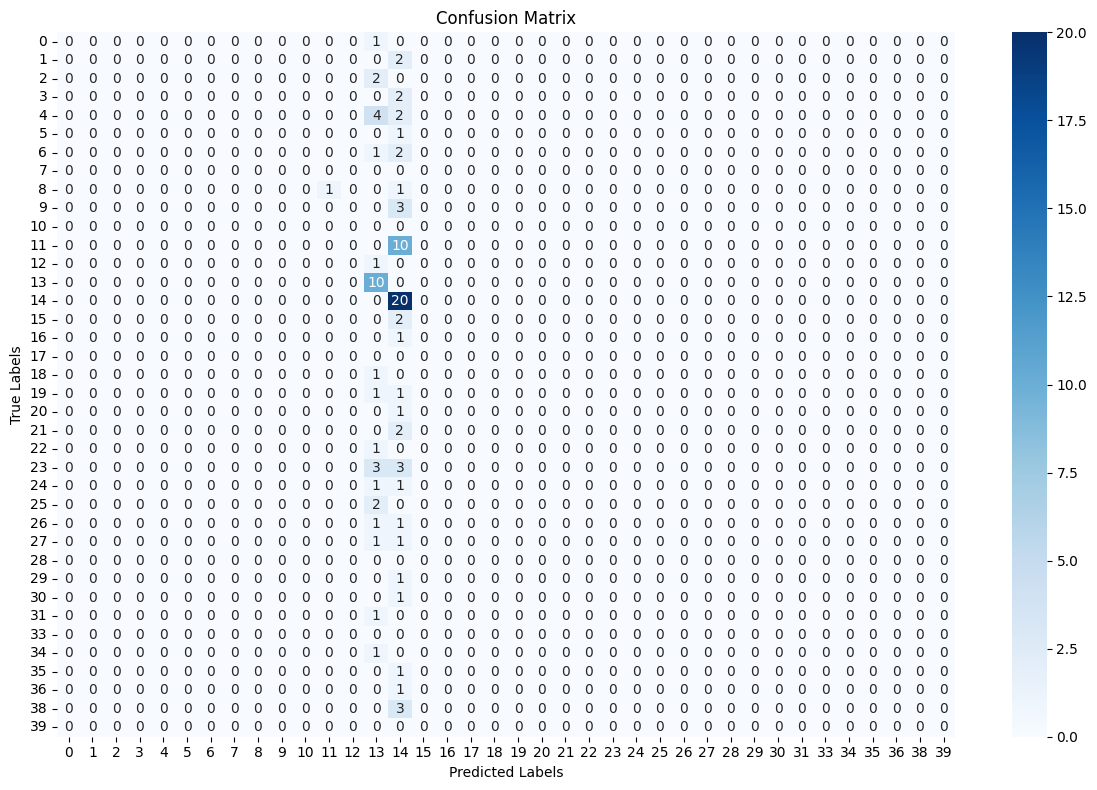

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have: preds, labels, and le (LabelEncoder fitted on y)

# 1. Ensure correct labels_list and class_names
# 1. Ensure correct labels_list and class_names
# 1. Ensure correct labels_list and class_names
labels_list = le.transform(le.classes_)  # Label indices: [0, 1, 2, ...]
class_names = [str(cn) for cn in le.classes_]  # Convert class names to strings

# 2. Generate Classification Report
report = classification_report(
    labels, preds,
    labels=labels_list,
    target_names=class_names,
    zero_division=0
)

print("=== Classification Report ===\n")
print(report)

# 3. Generate Confusion Matrix
cm = confusion_matrix(labels, preds, labels=labels_list)

# 4. Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    cm,
    annot=True,  # Show numbers in the boxes
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Interferance Pipeline# New Section

In [ ]:
# Inference Pipeline: Predict Beer Style
def predict_beer_style(text, model, tokenizer, label_encoder, max_len=128):
    # Step 1: Tokenize the input text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    # Step 2: Send input tensors to the same device as the model
    input_ids = encoding['input_ids'].to(model.device)
    attention_mask = encoding['attention_mask'].to(model.device)

    # Step 3: Make prediction
    model.eval()
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

    # Step 4: Decode the label index to the original class name
    predicted_label = label_encoder.inverse_transform(preds.cpu().numpy())[0]

    return predicted_label

# ===================
# Example usage
new_text = "This is a rich, malty beer with notes of chocolate and coffee."
predicted_style = predict_beer_style(new_text, model, tokenizer, le)
print(f"🍺 Predicted Beer Style: {predicted_style}")


🍺 Predicted Beer Style: 13


In [ ]:
def batch_predict_beer_styles(texts, model, tokenizer, label_encoder, max_len=128):
    encodings = tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encodings['input_ids'].to(model.device)
    attention_mask = encodings['attention_mask'].to(model.device)

    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        predicted_labels = label_encoder.inverse_transform(preds.cpu().numpy())

    return predicted_labels

# Example usage:
beer_texts = [
    "A light, crisp lager with a refreshing finish.",
    "Dark, roasted stout with hints of coffee and chocolate.",
    "Fruity IPA with a strong hoppy bitterness."
]
predicted_styles = batch_predict_beer_styles(beer_texts, model, tokenizer, le)
for text, style in zip(beer_texts, predicted_styles):
    print(f"Text: '{text}' -> 🍺 Style: {style}")


Text: 'A light, crisp lager with a refreshing finish.' -> 🍺 Style: 14
Text: 'Dark, roasted stout with hints of coffee and chocolate.' -> 🍺 Style: 13
Text: 'Fruity IPA with a strong hoppy bitterness.' -> 🍺 Style: 14


In [ ]:
import torch.nn.functional as F

def predict_top_k_beer_styles(text, model, tokenizer, label_encoder, k=3, max_len=128):
    # Tokenize input
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(model.device)
    attention_mask = encoding['attention_mask'].to(model.device)

    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)              # Softmax probabilities
        top_k_probs, top_k_indices = torch.topk(probs, k, dim=1)

    top_k_probs = top_k_probs.squeeze().cpu().numpy()
    top_k_indices = top_k_indices.squeeze().cpu().numpy()
    top_k_labels = label_encoder.inverse_transform(top_k_indices)

    # Combine labels and probabilities
    top_k_results = list(zip(top_k_labels, top_k_probs))

    return top_k_results

# Example usage:
new_text = "A full-bodied stout with coffee undertones."
top_k_styles = predict_top_k_beer_styles(new_text, model, tokenizer, le, k=3)
print("🍺 Top-3 Predicted Styles:")
for style, prob in top_k_styles:
    print(f" - {style}: {prob:.2f}")


🍺 Top-3 Predicted Styles:
 - 13: 0.13
 - 11: 0.06
 - 14: 0.05
